<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-YvTur/blob/main/Actividad_Semanal_6_Visualizacion_A00813752.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualizacion

###1 Descarga los datos a un sitio externo. y carga el dataset en tu libreta.

In [1]:
#importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:

#leemos el archivo csv y lo guardamos en un dataframe
path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df = pd.read_csv(path, index_col=0)
df.head() #mostramos las primeras 5 filas del dataframe

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


###2 Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [3]:
#Usamos el metodo shape
print("El DataFrame tiene {} filas y {} columnas".format(df.shape[0], df.shape[1]))

El DataFrame tiene 30000 filas y 24 columnas


In [4]:
#Renombramos las columnas
df.rename(columns = {"X1": "Monto", "X2": "Genero", "X3": "Educacion", "X4" : "Estado_Civil", "X5" : "Edad",
                     "X6": "PAG_SEP", "X7": "PAG_AGO", "X8":"PAG_JUL", "X9": "PAG_JUN", "X10":"PAG_MAY", "X11": "AMORT.ABR", "X12": "ESTCTA_SEP", "X13": "ESTCTA_AGO", "X14": "ESTCTA_JUL", "X15":"ESTCTA_JUN",
                     "X16": "ESTCTA_MAY", "X17":"ESTCTA_ABR", "X18":"MP_SEP", "X19":"MP_AGO", "X20":"MP_JUL", "X21":"MP_JUN", "X22":"MP_MAY", "X23":"MP_ABR", "Y":"Var_Sal"}, inplace = True)


print("Las columnas del DataFrame son: {}".format(df.columns))

Las columnas del DataFrame son: Index(['Monto', 'Genero', 'Educacion', 'Estado_Civil', 'Edad', 'PAG_SEP',
       'PAG_AGO', 'PAG_JUL', 'PAG_JUN', 'PAG_MAY', 'AMORT.ABR', 'ESTCTA_SEP',
       'ESTCTA_AGO', 'ESTCTA_JUL', 'ESTCTA_JUN', 'ESTCTA_MAY', 'ESTCTA_ABR',
       'MP_SEP', 'MP_AGO', 'MP_JUL', 'MP_JUN', 'MP_MAY', 'MP_ABR', 'Var_Sal'],
      dtype='object')


In [5]:
#Usamos el metodo head
print("Las primeras 5 filas del DataFrame son: {}".format(df.head()))

Las primeras 5 filas del DataFrame son:      Monto  Genero  Educacion  Estado_Civil  Edad  PAG_SEP  PAG_AGO  PAG_JUL  \
ID                                                                             
1    20000     2.0        2.0           1.0  24.0      2.0      2.0     -1.0   
2   120000     2.0        2.0           2.0  26.0     -1.0      2.0      0.0   
3    90000     2.0        2.0           2.0  34.0      0.0      0.0      0.0   
4    50000     2.0        2.0           1.0  37.0      0.0      0.0      0.0   
5    50000     1.0        2.0           1.0  57.0     -1.0      0.0     -1.0   

    PAG_JUN  PAG_MAY  ...  ESTCTA_JUN  ESTCTA_MAY  ESTCTA_ABR  MP_SEP  \
ID                    ...                                               
1      -1.0     -2.0  ...         0.0         0.0         0.0     0.0   
2       0.0      0.0  ...      3272.0      3455.0      3261.0     0.0   
3       0.0      0.0  ...     14331.0     14948.0     15549.0  1518.0   
4       0.0      0.0  ...     2831

In [6]:
#info del DataFrame con el método dtypes
print("Los tipos de datos del DataFrame son: {}".format(df.dtypes))

Los tipos de datos del DataFrame son: Monto             int64
Genero          float64
Educacion       float64
Estado_Civil    float64
Edad            float64
PAG_SEP         float64
PAG_AGO         float64
PAG_JUL         float64
PAG_JUN         float64
PAG_MAY         float64
AMORT.ABR       float64
ESTCTA_SEP      float64
ESTCTA_AGO      float64
ESTCTA_JUL      float64
ESTCTA_JUN      float64
ESTCTA_MAY      float64
ESTCTA_ABR      float64
MP_SEP          float64
MP_AGO          float64
MP_JUL          float64
MP_JUN          float64
MP_MAY          float64
MP_ABR          float64
Var_Sal         float64
dtype: object


In [7]:
#Tener info del DataFrame con el método info()
print("La información del DataFrame es: {}".format(df.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Monto         30000 non-null  int64  
 1   Genero        29999 non-null  float64
 2   Educacion     29998 non-null  float64
 3   Estado_Civil  29998 non-null  float64
 4   Edad          29995 non-null  float64
 5   PAG_SEP       29997 non-null  float64
 6   PAG_AGO       29995 non-null  float64
 7   PAG_JUL       29993 non-null  float64
 8   PAG_JUN       29991 non-null  float64
 9   PAG_MAY       29984 non-null  float64
 10  AMORT.ABR     29986 non-null  float64
 11  ESTCTA_SEP    29989 non-null  float64
 12  ESTCTA_AGO    29989 non-null  float64
 13  ESTCTA_JUL    29987 non-null  float64
 14  ESTCTA_JUN    29985 non-null  float64
 15  ESTCTA_MAY    29983 non-null  float64
 16  ESTCTA_ABR    29990 non-null  float64
 17  MP_SEP        29992 non-null  float64
 18  MP_AGO        29991 non-nu

In [8]:
# la información del DataFrame con el método isna()
print("El DataFrame tiene {} valores nulos".format(df.isna().sum().sum()))

El DataFrame tiene 196 valores nulos


###3 Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [9]:
#Quitar los registros nulos
df = df.dropna()

In [10]:
# los valores nulos con la media de la columna
df = df.fillna(df.mean())

###4 Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [12]:
# la estadística descriptiva con el método describe()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monto,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
Genero,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
Educacion,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
Estado_Civil,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
Edad,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
PAG_SEP,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
PAG_AGO,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
PAG_JUL,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
PAG_JUN,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
PAG_MAY,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


###5 Realiza el conteo de las variables categóricas

In [13]:
#creamos una copia
df2 = df.copy()

df_categorical = df2.drop(["Monto", "Edad", "AMORT.ABR", "ESTCTA_SEP", "ESTCTA_AGO", "ESTCTA_JUL", "ESTCTA_JUN", "ESTCTA_MAY", "ESTCTA_ABR", "MP_SEP", "MP_AGO", "MP_JUL", "MP_JUN", "MP_MAY", "MP_ABR"], axis=1)

df_categorical.head()

,Genero,Educacion,Estado_Civil,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,Var_Sal
ID,,,,,,,,,
1,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,1.0
2,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,1.0
3,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0


In [14]:
print("El DataFrame tiene {} filas y {} columnas".format(df_categorical.shape[0], df_categorical.shape[1]))

El DataFrame tiene 29958 filas y 9 columnas


In [15]:
#PCA variables numéricas 
df_numerical = df2.drop(["Genero", "Educacion", "Estado_Civil", "PAG_SEP", "PAG_AGO", "PAG_JUL", "PAG_JUN", "PAG_MAY", "Var_Sal"], axis=1)
df_numerical.head()

,Monto,Edad,AMORT.ABR,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
ID,,,,,,,,,,,,,,,
1,20000,24.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


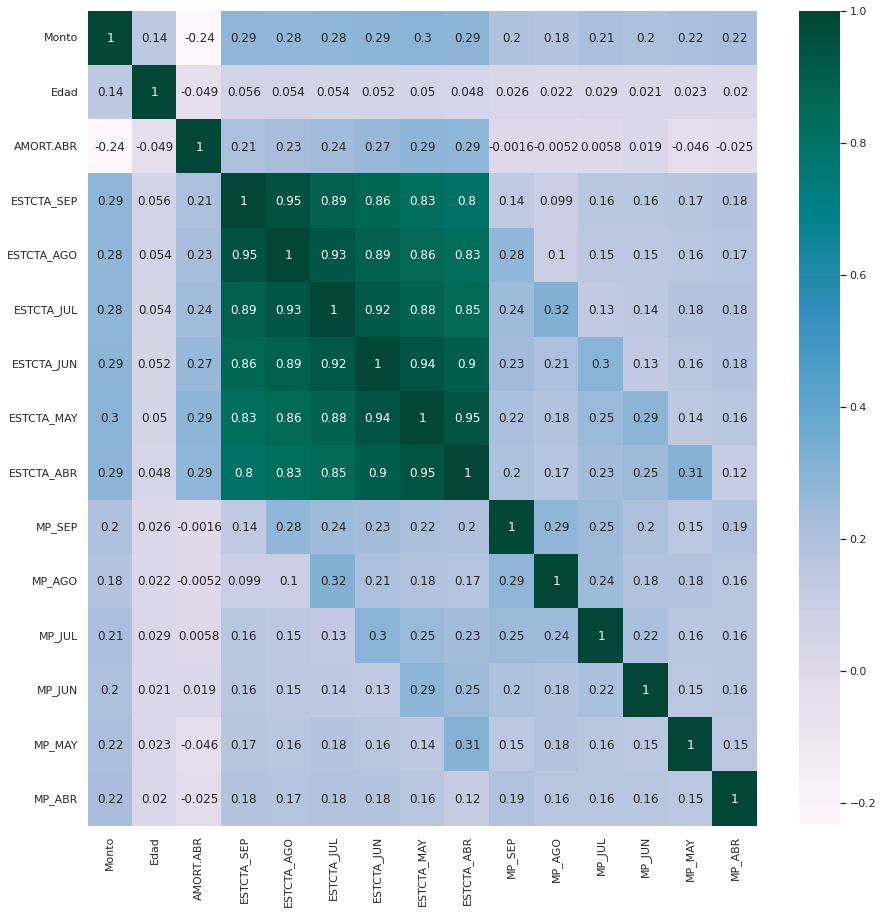

In [17]:
#correlación entre variables
corr = df_numerical.corr()
sns.set(rc = {'figure.figsize':(15, 15)})
sns.heatmap(corr, annot=True, cmap="PuBuGn")

#### 6 Escala los datos, si consideras necesario, con StandardScaler() y explica los resultados

In [18]:
#Escalar con StandardScaler()
scaler = StandardScaler()

#Ajustar modelo
scaler.fit(df_numerical)

#Transformacion
scaled_data = scaler.transform(df_numerical)

#Conversion
scaled_data = pd.DataFrame(scaled_data, columns=df_numerical.columns)

#Mostar los datos
scaled_data.head()

,Monto,Edad,AMORT.ABR,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
0,-1.137363,-1.246282,-1.486513,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,1.993916,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,0.253701,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,0.253701,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,0.253701,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


### EXPLICACIÓN DE LOS RESULTADOS

Tuvo que escalarse los datos para varias razones. 


1 Sera necesario ejecutar un metodo PCA. no puedes hacer una combinacion de vectores cuando un vector esta desproporcionado del otro, se peude pero no regresa algo con valor. 

2. Es mas facil entender los resutlados de esta forma al entender sus rangos max y min de todos. Para ejecutar un analisis apropiado

###Reduce las dimensiones con PCA, si consideras necesario.

In [19]:
#Reduce las dimensiones con PCA
from os import PRIO_PROCESS


pca = PCA(n_components=4)

#Ajusta el modelo
pca_data = pca.fit_transform(scaled_data)


summary = pd.DataFrame({
    "Desviación estándar": np.sqrt(pca.explained_variance_),
    "Varianza proporcional": pca.explained_variance_ratio_,
    "Varianza acumulada": np.cumsum(pca.explained_variance_ratio_)
})

summary = summary.transpose()

summary.columns = ["PC{}".format(i) for i in range(1, len(summary.columns) + 1)]

summary.round(4)

,PC1,PC2,PC3,PC4
Desviación estándar,2.4449,1.3489,1.0744,0.9769
Varianza proporcional,0.3985,0.1213,0.0770,0.0636
Varianza acumulada,0.3985,0.5198,0.5967,0.6604


In [20]:
pca = PCA(n_components=9)
pca_data = pca.fit_transform(scaled_data)

#Convierte los datos a un DataFrame
summary = pd.DataFrame({
    "Desviación estándar": np.sqrt(pca.explained_variance_),
    "Varianza proporcional": pca.explained_variance_ratio_,
    "Varianza acumulada": np.cumsum(pca.explained_variance_ratio_)
})

summary = summary.transpose()

summary.columns = ["PC{}".format(i) for i in range(1, len(summary.columns) + 1)]

summary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Desviación estándar,2.4449,1.3489,1.0744,0.9769,0.9451,0.9346,0.9219,0.8821,0.8521
Varianza proporcional,0.3985,0.1213,0.0770,0.0636,0.0595,0.0582,0.0567,0.0519,0.0484
Varianza acumulada,0.3985,0.5198,0.5967,0.6604,0.7199,0.7781,0.8348,0.8867,0.9351


###8 Elabora los histogramas de los atributos para visualizar su distribución

In [22]:
PC_components = summary.columns
PC_components

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

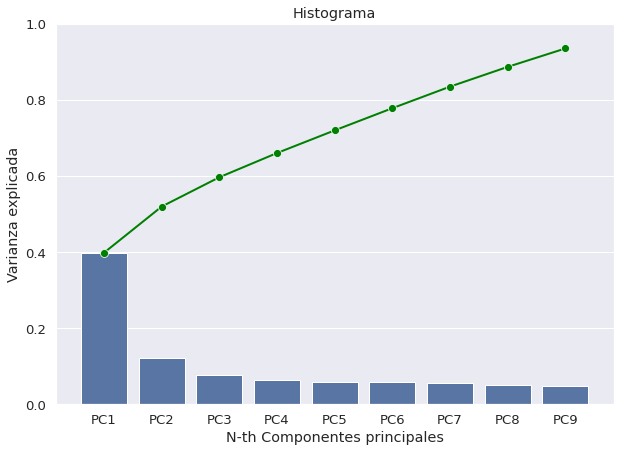

In [32]:
PC_components = summary.columns
#PC_components

_ = sns.set(style = 'darkgrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components, 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'green', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Histograma')
plt.xlabel('N-th Componentes principales')
plt.ylabel('Varianza explicada')
plt.ylim(0, 1)
plt.show()

###9 Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc

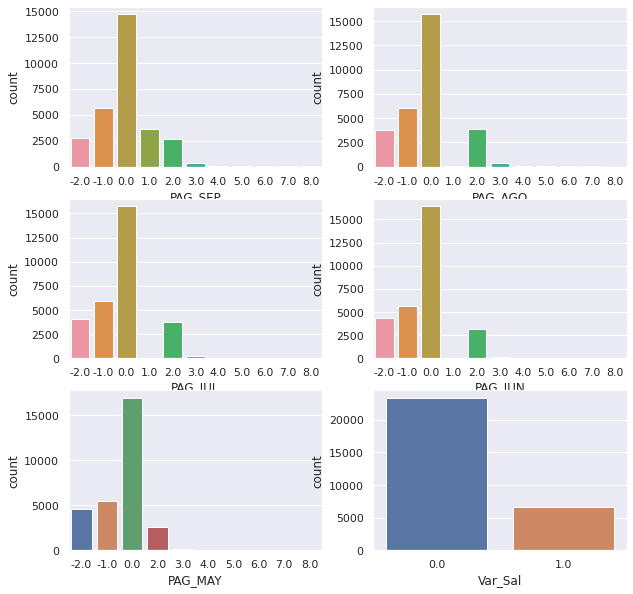

In [29]:
sns.set(rc = {'figure.figsize':(10, 10)})
names = ['PAG_SEP', 'PAG_AGO', 'PAG_JUL', 'PAG_JUN', 'PAG_MAY', 'Var_Sal']
fig, axes = plt.subplots(3, 2)
k = 0
for i in range(3):
    for j in range(2):
        sns.countplot(x=names[k], data=df, ax=axes[i, j])
        k += 1
plt.show()

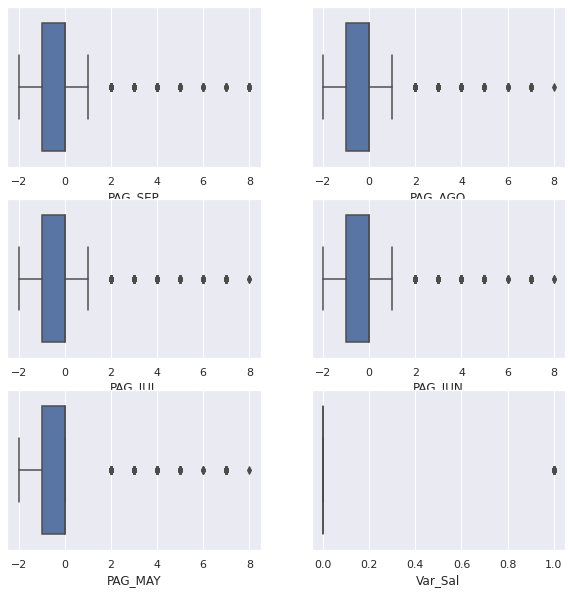

In [28]:
#Boxplot
sns.set(rc = {'figure.figsize':(10, 10)})
names = ['PAG_SEP', 'PAG_AGO', 'PAG_JUL', 'PAG_JUN', 'PAG_MAY', 'Var_Sal']
fig, axes = plt.subplots(3, 2)
k = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(x=names[k], data=df, ax=axes[i, j])
        k += 1
plt.show()

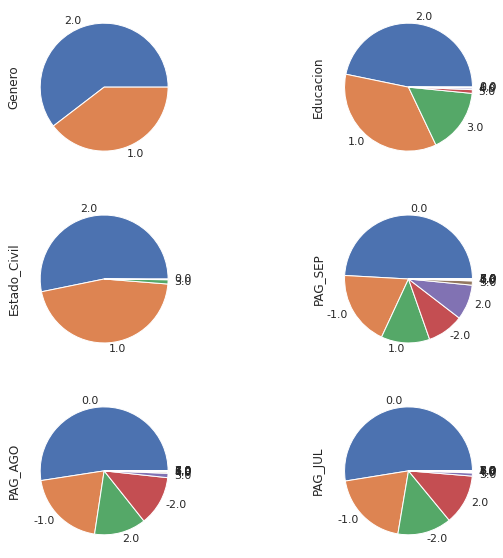

In [27]:
sns.set(rc = {'figure.figsize':(10, 10)})
fig, axes = plt.subplots(3, 2)
k = 0
for i in range(3):
    for j in range(2):
        df_categorical.iloc[:, k].value_counts().plot(kind='pie', ax=axes[i, j])
        k += 1
plt.show()

###10 Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

A. Usando plot. Al visualizar las variables categoricas nos damos cuenta de una pocoa proporcion entre las variables. Lo cual indica que debemos hacer intervencion en esa parte. 

B. Usando boxplot. Podemos visualizar unos margenes fuera de lo escencial, es decir valores numercios atipicos, los cuales no son convenientes

C. Al utilizar diagramas pastel, la verdad es que este confunde un poco, sera necesario replantear lo de proporicones a otro tipo de grafica. 